# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
display(dataset.head(10))

# Define independent variables X
# X = Annual Income (k$) and Spending Score (1-100)

X_df = dataset.iloc[:, 3:5] # every rows, every numerical columns except last
display(X_df.head(10))

X = dataset.iloc[:, [3, 4]].values

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


## Using dendrogram to find optimal number of clusters

HC commonly displayed as a tree diagram called a dendrogram. They begin with each object in a separate
cluster. At each step, the two clusters that are most similar are joined into a single new cluster. Once fused,
objects are never separated.

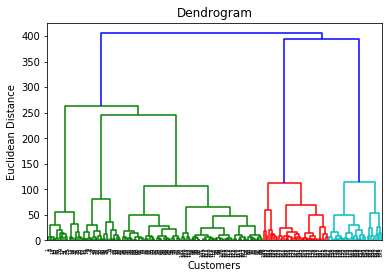

In [3]:
import scipy.cluster.hierarchy as sch
# method: clustering technique, ward = most recommended method, clusters with observration not varying much, low variance
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

The vertical axis of the dendrogram represents the distance or dissimilarity between clusters. The horizontal axis
represents the objects and clusters. The dendrogram is fairly simple to interpret. Remember that our main interest
is in similarity and clustering. Each joining (fusion) of two clusters is represented on the graph by the splitting of
a vertical line into two vertical lines. The vertical position of the split, shown by the short horizontal bar,
gives the distance (dissimilarity) between the two clusters

--> optimal number of clusters = where Dedrogram Euclidean distance is biggest --> 5 clusters

## Applying HC to dataset

In [4]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters: The number of clusters to form as well as the number of centroids to generate.

# affinity : Metric used to compute the linkage. 
# Can be “euclidean”, “l1”, “l2”, ... If linkage is “ward”, only “euclidean” is accepted.

# linkage: The linkage criterion determines which distance to use between sets of observation. 
# The algorithm will merge the pairs of cluster that minimize this criterion.
# ward minimizes the variance of the clusters being merged.

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

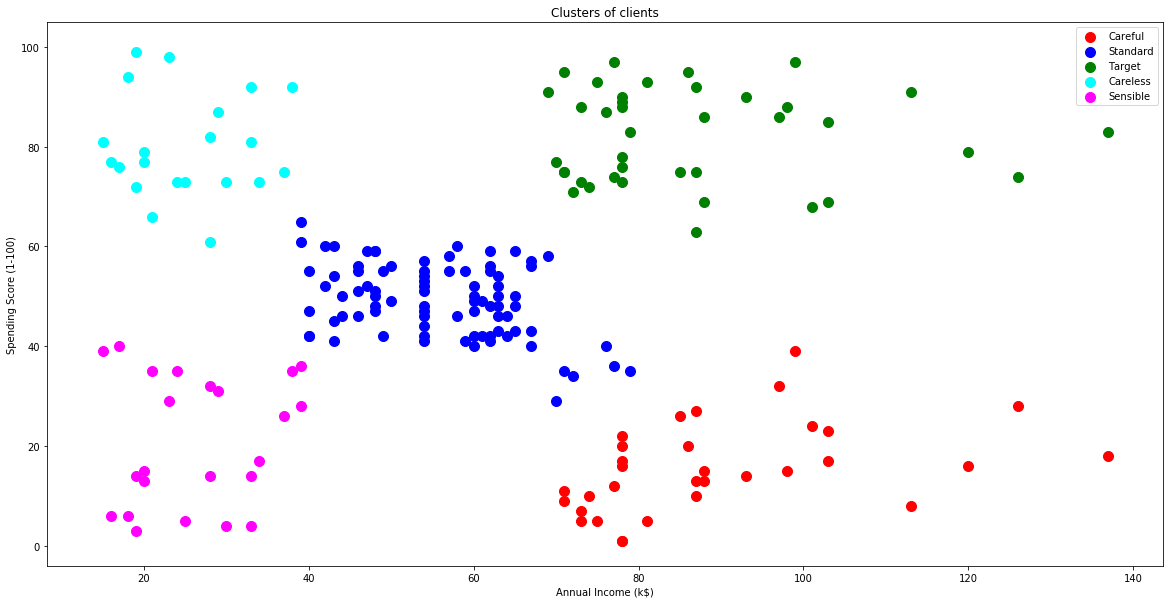

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')  
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In data mining and statistics, hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters.